In [30]:
#loading the necessary libraraies 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
#loading the dataset
data=pd.read_csv("/home/enojeyyyyyyy/python_projects/housing.csv")
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [32]:
print("The shape of data is",data.shape)
print("The columns name in the data is",data.columns)

The shape of data is (20640, 10)
The columns name in the data is Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='str')


In [33]:
#Data Cleaning
print("the number of null data is",data.isnull().sum())

the number of null data is longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [39]:
#Handling missing values in total_bedrooms using median
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].median())

In [43]:
#the data_type of the columns is
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity           str
dtype: object

In [45]:
'''The feature housing_median_age was chosen because the age of houses often influences their price.'''
# Selecting the input feature
X = data[['housing_median_age']]   

# Selecting the target variable
y = data['median_house_value']  

'''Linear Regression was chosen because the target variable, median house value, is continuous and we want to understand how it changes with respect to the input feature. Linear regression is simple, interpretable, and effective for modeling the relationship between numerical variables, making it appropriate for predicting housing prices in this task.'''

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


'''Mean Squared Error (MSE) measures the average of the squared differences between the actual values and the predicted values. It indicates how far the model’s predictions are from the true values, where a lower MSE means better model performance.'''

In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Predict on test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Squared Error (MSE): 12939617265.100323
R² Score: 0.012551235533311389


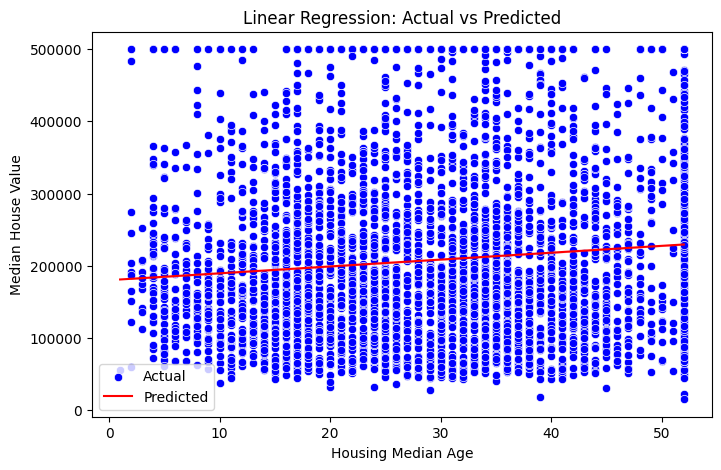

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual data
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_test['housing_median_age'], y=y_test, color='blue', label='Actual')

# Regression line (predictions)
sns.lineplot(x=X_test['housing_median_age'], y=y_pred, color='red', label='Predicted')

plt.xlabel('Housing Median Age')
plt.ylabel('Median House Value')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()


Linearity → The relationship between input (housing_median_age) and output (median_house_value) is assumed to be linear.

Independence → Observations are independent of each other.

Homoscedasticity → The variance of errors is constant across all values of the input feature.

Normality of errors → Residuals (differences between actual and predicted values) are normally distributed.

No multicollinearity → Not relevant for single-feature regression, but important for multiple features.


In [54]:
# Coefficient (slope)
slope = model.coef_[0]

# Intercept
intercept = model.intercept_

print("Coefficient (slope):", slope)
print("Intercept:", intercept)

Coefficient (slope): 951.4618671496021
Intercept: 179975.00158647474


'''
Coefficient (slope):
Represents the change in the target variable (median_house_value) for each one-unit increase in the input feature (housing_median_age).

Intercept
The predicted value of the target variable when the input feature is 0.
'''

In [56]:
X_multi = data.drop('median_house_value', axis=1)
y_multi = data['median_house_value']

In [58]:
# Convert categorical 'ocean_proximity' into numeric columns
X_multi = pd.get_dummies(X_multi, columns=['ocean_proximity'], drop_first=True)

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X_multi)

'''
Using multiple features can improve prediction performance because housing prices are influenced by many factors, not just one. For example, the number of rooms, population, median income, and location all affect house value. By including all relevant features, the model can capture more information and relationships, making predictions more accurate and reliable compared to using a single feature.
'''

In [61]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_multi, test_size=0.2, random_state=42
)
# Create the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [62]:
# Predict on test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Squared Error (MSE): 4908476721.156616
R² Score: 0.6254240620553606


In [63]:
# Coefficient (slope)
slope = model.coef_[0]

# Intercept
intercept = model.intercept_

print("Coefficient (slope):", slope)
print("Intercept:", intercept)

Coefficient (slope): -53770.02948989961
Intercept: 206645.58580614213


Each coefficient shows how much the median house value changes for a one-unit increase in that feature, keeping other features constant. Unlike the single-feature model, the multiple-feature model considers all relevant factors together, making predictions more accurate and realistic.

model 2 perfomed better with r2 score of  0.6254240620553606 while model 1 had r2 score of 0.012551235533311389

Using multiple features helps performance because the model can consider many factors that influence house prices, capturing more information and reducing bias. However, it can hurt performance if some features are irrelevant or highly correlated, which may introduce noise or multicollinearity. 
The single-feature model is easier to interpret because it has only one coefficient and a simple relationship, while the multiple-feature model is more complex but usually more accurate.